<a href="https://colab.research.google.com/github/MsNeron/dap-2024/blob/main/%20les06/rep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная иабота № 6. Линнейная регрессия


### Задание 1. Выведете описание набора данных и наименование признаков.

In [ ]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# Загрузка данных Diabetes
diabetes = datasets.load_diabetes()

# Вывод описания набора данных
print("Описание набора данных Diabetes:")
print(diabetes.DESCR)

# Вывод наименований признаков
print("\nНаименования признаков:")
print(diabetes.feature_names)


Описание набора данных Diabetes:
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of th

### Задание 2. Из загруженного набора данных создайте DataFrame, содержащий как признаки, так и целевое значение. Выведите первые 5 строк набора.

In [ ]:
# Создание DataFrame
# Объединение признаков и целевого значения
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
# Добавление целевого значения в DataFrame
diabetes_df['target'] = diabetes.target

# Вывод первых 5 строк набора данных
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### Задание 3. Выведете информацию о типах данных в наборе. Имеются ли в наборе категориальные признаки? Имеются ли в наборе данные имеющие значение null?

In [ ]:
# Вывод информации о типах данных
print(diabetes_df.info())

# Сообщение об отсутствии категориальных признаков
print("\nВсе признаки являются числами.\n")

# Проверка на наличие значений null
print("\nПроверка на значения null:")
if diabetes_df.isnull().any().any():
    print("В данных имеются значения null.")
    print(diabetes_df.isnull().sum())
else:
    print("В данных отсутствуют значения null.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None

Все признаки являются числами.


Проверка на значения null:
В данных отсутствуют значения null.


### Задание 4. Постройте матрицу корреляции.

In [ ]:
# Построение матрицы корреляции
correlation_matrix = diabetes_df.corr()

# Вывод матрицы корреляции
print("Матрица корреляции:")
correlation_matrix



Матрица корреляции:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


### Задание 5. Постройте диаграмму рассеяния целевого значение и признака, коэффициент корреляции которого с целевым значением, самый высокий.

Text(0, 0.5, 'Target')

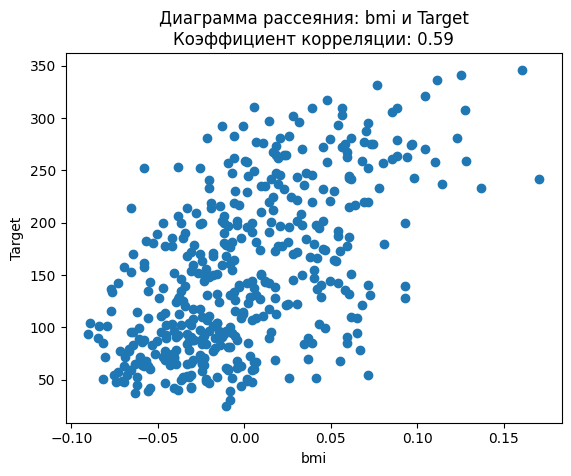

In [ ]:
# Нахождение признака с максимальной корреляцией с целевым значением
target_correlations = correlation_matrix['target'].drop('target')  # Убираем саму цель из корреляций
most_correlated_feature = target_correlations.idxmax()
highest_correlation = target_correlations.max()

# Построение диаграммы рассеяния
plt.title(f"Диаграмма рассеяния: {most_correlated_feature} и Target\nКоэффициент корреляции: {highest_correlation:.2f}")
x = diabetes_df[most_correlated_feature]
y = diabetes_df['target']
plt.scatter(x,y)
plt.xlabel(most_correlated_feature)
plt.ylabel('Target')


### Задание 6. Сформируйте набор признаков (X) из 5 признаков с самым высоким коэффициентом корреляции с целевым значением. Сформируйте набор для целевого значения (y).

In [ ]:
# Вычисление корреляции с целевым значением
target_correlations = correlation_matrix['target'].drop('target')

# Определение 5 признаков с наибольшей корреляцией с целевым значением
top_5_features = target_correlations.nlargest(5).index.tolist()

# Формирование наборов X и y
X = diabetes_df[top_5_features]
y = diabetes_df['target']

# Вывод результатов
print("Пять признаков с наибольшей корреляцией с целевым значением:")
print(top_5_features)
print("\nПример набора X:")
print(X.head())
print("\nПример набора y:")
print(y.head())


Пять признаков с наибольшей корреляцией с целевым значением:
['bmi', 's5', 'bp', 's4', 's6']

Пример набора X:
        bmi        s5        bp        s4        s6
0  0.061696  0.019907  0.021872 -0.002592 -0.017646
1 -0.051474 -0.068332 -0.026328 -0.039493 -0.092204
2  0.044451  0.002861 -0.005670 -0.002592 -0.025930
3 -0.011595  0.022688 -0.036656  0.034309 -0.009362
4 -0.036385 -0.031988  0.021872 -0.002592 -0.046641

Пример набора y:
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


### Задание 7. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.

In [ ]:
from sklearn.model_selection import train_test_split
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


### Задание 8. Выполните обучение модели.

In [ ]:
# Импорт необходимых библиотек
from sklearn.linear_model import LinearRegression

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Вывод коэффициентов модели
print("Коэффициенты модели:", model.coef_)
print("Свободный член (intercept):", model.intercept_)


[159.45105577 167.61031608 178.94218746 264.32427205 139.7593049 ]
287    219.0
211     70.0
72     202.0
321    230.0
73     111.0
Name: target, dtype: float64
Коэффициенты модели: [617.34488175 406.11493001 311.95779091 103.53984822  18.90668829]
Свободный член (intercept): 151.64837887405028


### Задание 9. Расчитайте Root mean squared error (RMSE)

In [ ]:
# Импорт необходимых библиотек
from sklearn.metrics import mean_squared_error

# Предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Вывод результата
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Root Mean Squared Error (RMSE): 52.66


### Задание 10. Расчитайте R² (коэффициент детерминации)

In [ ]:
# Импорт необходимой библиотеки
from sklearn.metrics import r2_score

# Вычисление R²
r2 = r2_score(y_test, y_pred)

# Вывод результата
print(f"Коэффициент детерминации (R²): {r2:.2f}")

Коэффициент детерминации (R²): 0.50
